In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/My_projects/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

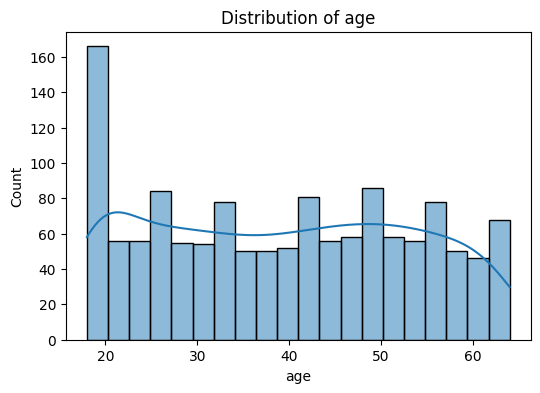

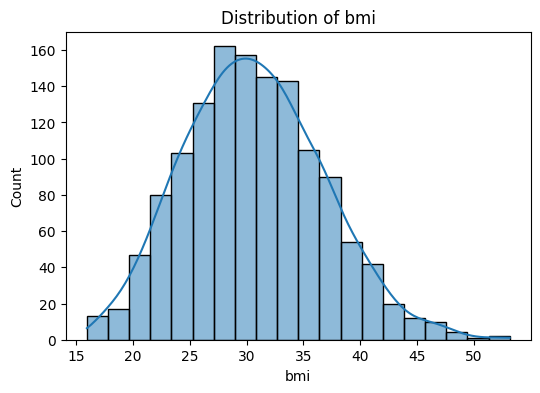

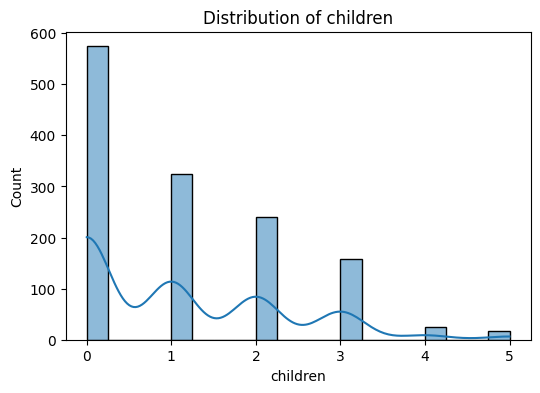

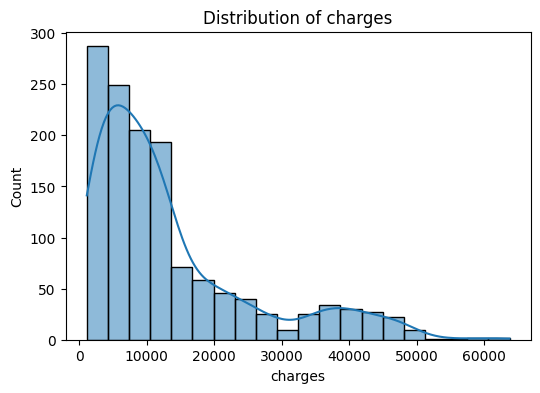

In [ ]:
numeric_columns = ['age' ,	'bmi', 'children', 'charges']
for cols in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[cols], kde=True, bins=20)
  plt.title(f"Distribution of {cols}")
  plt.show()


<Axes: xlabel='children', ylabel='count'>

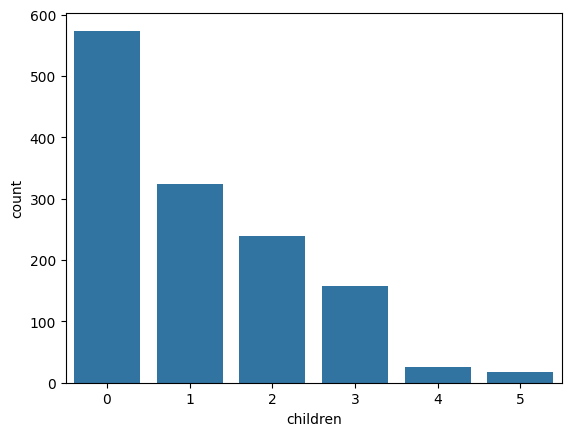

In [ ]:
sns.countplot(x = df['children'])

<Axes: xlabel='smoker', ylabel='count'>

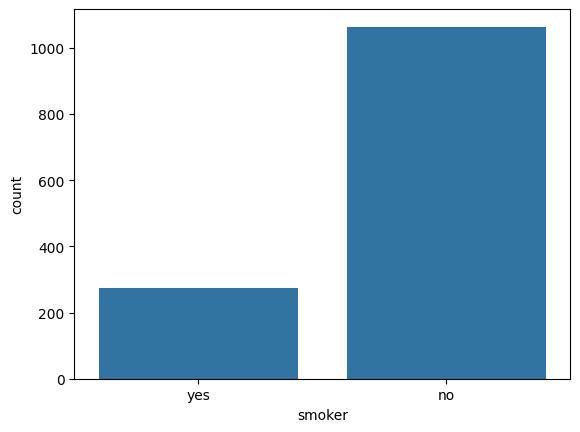

In [ ]:
sns.countplot(x = df['smoker'])

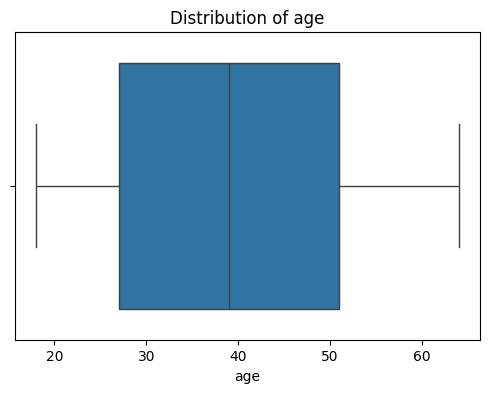

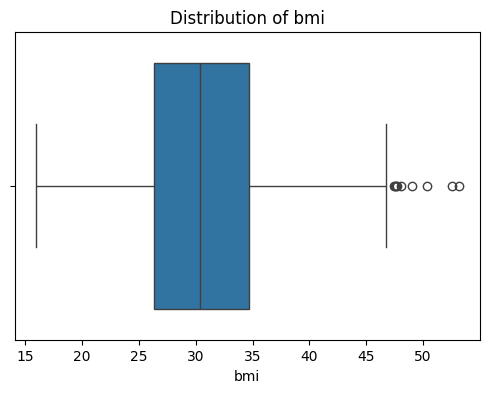

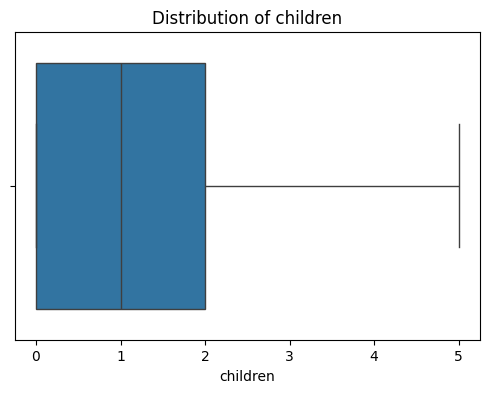

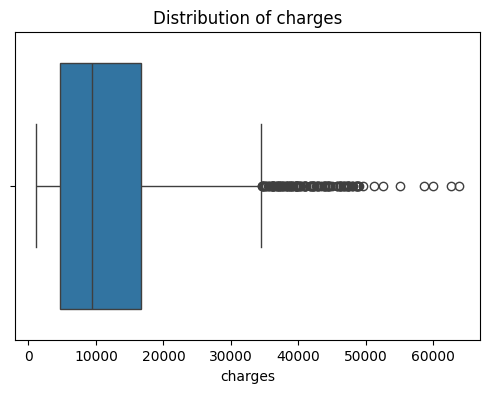

In [ ]:
for cols in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[cols])
  plt.title(f"Distribution of {cols}")
  plt.show()

<Axes: >

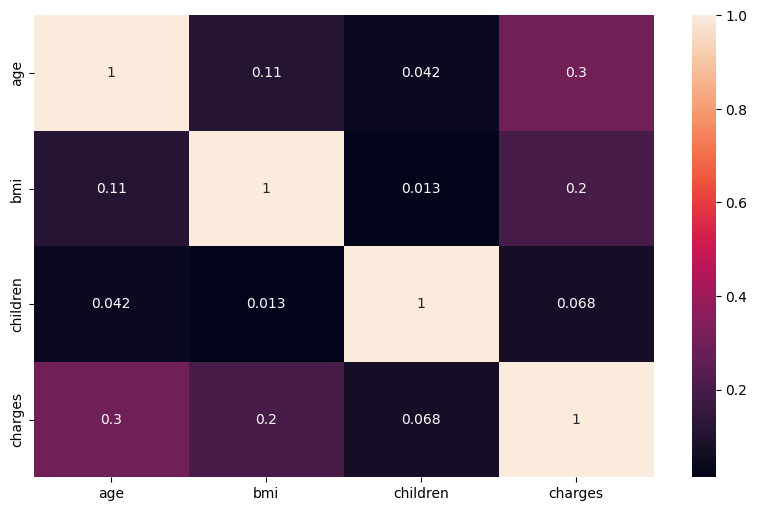

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing


In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0, 'female':1})

In [ ]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes':1, 'no':0})

In [ ]:
df_cleaned.rename(columns={
    'sex' : 'is_female',
    'smoker' : 'is_smoker'
}, inplace=True)


In [ ]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], drop_first=True)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [ ]:
df_cleaned = df_cleaned.astype('int')

<Axes: xlabel='bmi', ylabel='Count'>

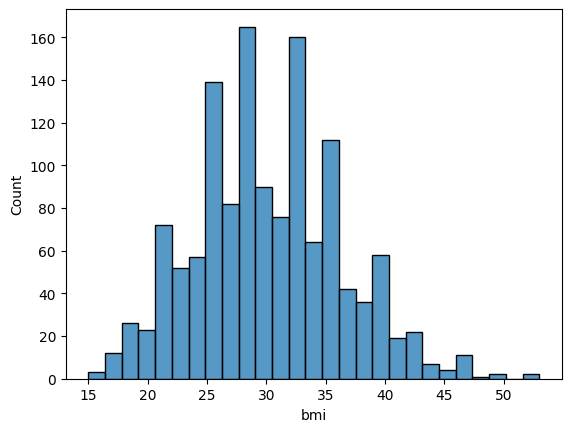

In [ ]:
# Feature Engineering and Extraction
sns.histplot(df_cleaned['bmi'])

In [ ]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ['bmi_category'], drop_first=True)

In [ ]:
df_cleaned = df_cleaned.astype('int')

In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = ['age', 'bmi','children']
scaler = StandardScaler()
for cols in columns:
  df_cleaned[cols] = scaler.fit_transform(df_cleaned[[cols]])



In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
# Pearson Correlation Calculation

from scipy.stats import pearsonr


features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
       ]


correlations = {
    feature : pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlations_df.sort_values(by='Correlation', ascending=False, inplace=True)
correlations_df

,Feature,Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [ ]:
cat_features = ['is_female', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd


alpha = 0.05
df_cleaned['charges_bin']= pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_results = {}


for cols in cat_features:
  contingency = pd.crosstab(df_cleaned[cols], df_cleaned['charges_bin'])
  chi2_stat, p_val, _, _ = chi2_contingency(contingency)
  decision = "Reject Null (keep feature) " if p_val < alpha else "Accept Null (drop feature)"
  chi2_results[cols] = {'Chi2 Statistic': chi2_stat, 'p_value': p_val, 'Decision': decision}


chi2_df = pd.DataFrame(chi2_results).T
chi2_df.sort_values(by='p_value', ascending=True)
chi2_df

,Chi2 Statistic,p_value,Decision
is_female,10.258784,0.01649,Reject Null (keep feature)
is_smoker,848.219178,0.0,Reject Null (keep feature)
region_northwest,1.13424,0.768815,Accept Null (drop feature)
region_southeast,15.998167,0.001135,Reject Null (keep feature)
region_southwest,5.091893,0.165191,Accept Null (drop feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (drop feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (drop feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep feature)


In [ ]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
        'region_southeast','bmi_category_Obese' ]]

In [ ]:
df.shape

(1338, 7)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7987962362937233